In [1]:
import numpy as np 
import pandas as pd 

# Import required libraries

In [2]:
#To avoid unnecessary warnings messages
import warnings
warnings.filterwarnings('ignore')

#Visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt

#To scale our data
from sklearn.preprocessing import StandardScaler

#To split the data into training and testing set
from sklearn.model_selection import train_test_split

#Classification model- Support Vector Machine
from sklearn.svm import SVC

#Classification model performance metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score


In [3]:
df=pd.read_csv(r'F:\4 YEAR\PROJ\main\diabetes (3).csv')
df.head()

,frontfoot,rearfoot,BMI,midfootavg,Age,Outcome
0,6,35,33.6,0.627,50,1
1,1,29,26.6,0.351,31,0
2,8,0,23.3,0.672,32,1
3,1,23,28.1,0.167,21,0
4,0,35,43.1,0.560,33,1


# Number of Rows and columns

In [4]:
df.shape

(768, 6)

# Dataset Information 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   frontfoot   768 non-null    int64  
 1   rearfoot    768 non-null    int64  
 2   BMI         768 non-null    float64
 3   midfootavg  768 non-null    float64
 4   Age         768 non-null    int64  
 5   Outcome     768 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 36.1 KB


# Data Description

In [6]:
df.describe()

,frontfoot,rearfoot,BMI,midfootavg,Age,Outcome
count,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,3.845052,20.536458,31.992578,0.41890,33.240885,0.348958
std,3.369578,15.952218,7.884160,0.26001,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.07800,21.000000,0.000000
25%,1.000000,0.000000,27.300000,0.23600,24.000000,0.000000
50%,3.000000,23.000000,32.000000,0.34500,29.000000,0.000000
75%,6.000000,32.000000,36.600000,0.56600,41.000000,1.000000
max,17.000000,99.000000,67.100000,2.42000,81.000000,1.000000


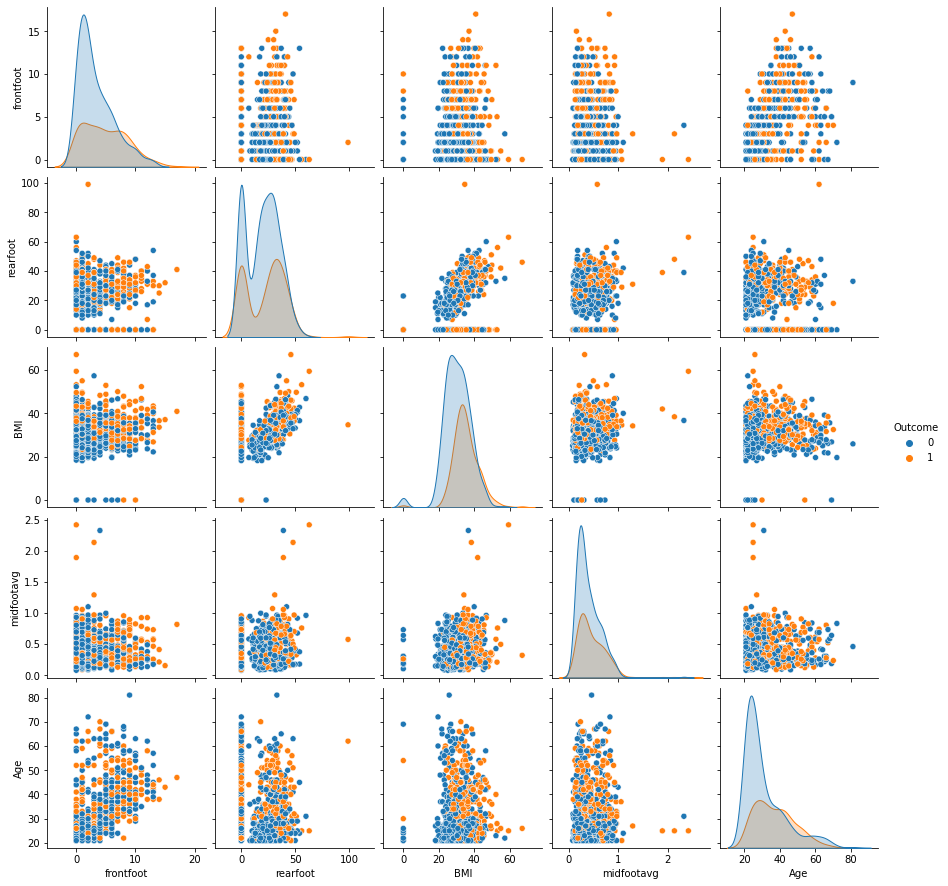

In [7]:
sns.pairplot(df,hue='Outcome')

# Data Correlation

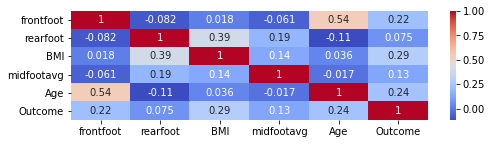

In [8]:
plt.figure(figsize=(8,2))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

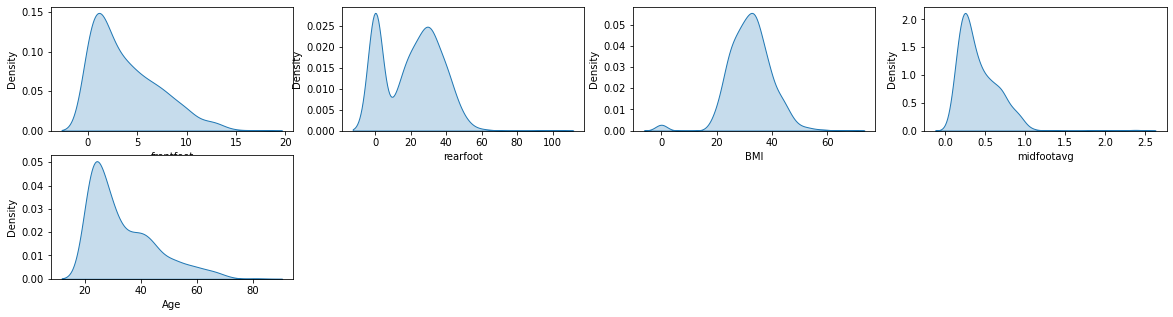

In [9]:
plt.figure(figsize=(20,5))
for i,col in enumerate(df.iloc[:,:-1]):
    plt.subplot(2,4,i+1)
    sns.kdeplot(df[col],shade=True)
plt.show()

# Target Grouped data mean

In [10]:
df.groupby('Outcome').mean()

,frontfoot,rearfoot,BMI,midfootavg,Age
Outcome,,,,,
0,3.298000,19.664000,30.304200,0.393630,31.190000
1,4.865672,22.164179,35.142537,0.466045,37.067164


# Target Value counts- Imbalanced data

In [11]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# Splitting dataset into features and target

In [12]:
x= df.drop('Outcome',axis=1)
y= df['Outcome']

# Scaling the data

In [13]:
ss=StandardScaler()
ss.fit(x)

StandardScaler()

In [14]:
x=ss.transform(x)

In [15]:
x

array([[ 0.63994726,  0.90726993,  0.20401277,  0.80087606,  1.4259954 ],
       [-0.84488505,  0.53090156, -0.68442195, -0.26131287, -0.19067191],
       [ 1.23388019, -1.28821221, -1.10325546,  0.97405904, -0.10558415],
       ...,
       [ 0.3429808 ,  0.15453319, -0.73518964, -0.66925499, -0.27575966],
       [-0.84488505, -1.28821221, -0.24020459, -0.26900989,  1.17073215],
       [-0.84488505,  0.65635768, -0.20212881, -0.39985925, -0.87137393]])

# Splitting dataset further into training and testing data

In [16]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=200,test_size=0.2,stratify=y)

# Model Evaluation

In [17]:
model=SVC(kernel='linear',C=10.0)

model.fit(xtrain,ytrain)
ypred=model.predict(xtest) 
ac=accuracy_score(ytest,ypred) 
cm=confusion_matrix(ytest,ypred) 
cr=classification_report(ytest,ypred) 
train=model.score(xtrain,ytrain) 
test=model.score(xtest,ytest)
    
print(f'{model} Accuracy:{ac}\n{cm}\n{cr}\nTraining Accuracy: {train}\nTesting Accuracy: {test}')


SVC(C=10.0, kernel='linear') Accuracy:0.7142857142857143
[[88 12]
 [32 22]]
              precision    recall  f1-score   support

           0       0.73      0.88      0.80       100
           1       0.65      0.41      0.50        54

    accuracy                           0.71       154
   macro avg       0.69      0.64      0.65       154
weighted avg       0.70      0.71      0.69       154

Training Accuracy: 0.6856677524429967
Testing Accuracy: 0.7142857142857143


In [18]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes=(100, ), max_iter=1000)  # You can adjust hidden_layer_sizes and max_iter as needed
mlp_model.fit(xtrain, ytrain)
mlp_test_score = mlp_model.score(xtest, ytest)


knn_model = KNeighborsClassifier()
knn_model.fit(xtrain, ytrain)
knn_test_score = knn_model.score(xtest, ytest)

nb_model = GaussianNB()
nb_model.fit(xtrain, ytrain)
nb_test_score = nb_model.score(xtest, ytest)

dt_model = DecisionTreeClassifier()
dt_model.fit(xtrain, ytrain)
dt_test_score = dt_model.score(xtest, ytest)

rf_model = RandomForestClassifier()
rf_model.fit(xtrain, ytrain)
rf_test_score = rf_model.score(xtest, ytest)

model_comparison = pd.DataFrame({
    'Model': ['Support Vector Machine', 'Naive Bayes','Decision Tree','K-Nearest Neighbors','Random Forest','Neural Network (MLP)'],
    'Accuracy': [test,nb_test_score,dt_test_score,knn_test_score,rf_test_score,mlp_test_score]
})

# Display the DataFrame
print(model_comparison)

                    Model  Accuracy
0  Support Vector Machine  0.714286
1             Naive Bayes  0.707792
2           Decision Tree  0.597403
3     K-Nearest Neighbors  0.603896
4           Random Forest  0.688312
5    Neural Network (MLP)  0.694805


# Model Deployment- Predictive System

In [ ]:
import sqlite3
import webbrowser
from tkinter import Frame, Label, Entry, Button, StringVar, Tk, messagebox,ttk
import numpy as np

# Create SQLite database connection
conn = sqlite3.connect('foot_pressure.db')
c = conn.cursor()

# Create table to store user information and foot pressure data
c.execute('''CREATE TABLE IF NOT EXISTS users
             (id INTEGER PRIMARY KEY, username TEXT, password TEXT)''')

c.execute('''CREATE TABLE IF NOT EXISTS foot_pressure
             (id INTEGER PRIMARY KEY, user_id INTEGER, front_foot_pressure REAL, 
             rear_foot_pressure REAL, mid_foot_pressure_avg REAL, BMI REAL, age INTEGER, output TEXT)''')


def callback(url):
    webbrowser.open_new(url)

def login():
    username = entry_username.get()
    password = entry_password.get()
    c.execute("SELECT * FROM users WHERE username=? AND password=?", (username, password))
    user = c.fetchone()

    if user:
        # If login is successful, open the main prediction page
        open_main_page(user[0])  # Pass user id to main page
    else:
        messagebox.showerror("Login Failed", "Invalid username or password")
        

        
def open_main_page(user_id):
    root.withdraw()  # Hide the login window
    main_page = Tk()
    main_page.geometry("800x800")
    main_page.title("Foot Pressure Prediction System")
    
    def take_data():
        sensor1 = float(entry1.get())
        sensor2 = float(entry2.get())
        sensor3 = float(entry3.get())
        sensor4 = float(entry4.get())
        BMI = float(entry5.get())
        age = int(entry6.get())
        front_foot_pressure = (((sensor1+sensor2)/2)/10)
        mid_foot_pressure_avg = sensor3/1000
        rear_foot_pressure = sensor4/10

        # Save the data to the database
        save_data(front_foot_pressure, rear_foot_pressure,BMI, mid_foot_pressure_avg, age)
    
    def save_data(front_foot_pressure, rear_foot_pressure,BMI, mid_foot_pressure_avg, age):
    # Predicting
        d1 = []
        d1.append(front_foot_pressure)
        d1.append(rear_foot_pressure)
        d1.append(BMI)
        d1.append(mid_foot_pressure_avg)
        d1.append(age)
        print(d1)
        array_input_data = np.asarray(d1)
        x = array_input_data.reshape(1, -1)
        standard_x = ss.transform(x)
        p=model.predict(standard_x)
        print(p)
        if p == 1:
            output = 'Patient has Diabetes'
        else:
            output = 'Patient Does Not has Diabetes'

        c.execute("INSERT INTO foot_pressure (user_id, front_foot_pressure, rear_foot_pressure, mid_foot_pressure_avg, BMI, age, output) VALUES (?, ?, ?, ?, ?, ?, ?)",
                  (user_id, front_foot_pressure, rear_foot_pressure, mid_foot_pressure_avg, BMI, age, output))
        conn.commit()

        outputlabel.configure(text=output)

    def view_saved_data():
        def go_back_to_login():
            saved_data_window.destroy()
            main_page.destroy()# Close the current window
            root.deiconify()
        c.execute("SELECT front_foot_pressure, rear_foot_pressure, mid_foot_pressure_avg, BMI, age, output FROM foot_pressure WHERE user_id=?", (user_id,))
        saved_data = c.fetchall()

        if saved_data:
            # Create a new window to display saved data
            saved_data_window = Tk()
            saved_data_window.title("Saved Foot Pressure Data")
            saved_data_window.geometry("600x400")

            # Create a treeview widget to display the data
            tree = ttk.Treeview(saved_data_window)
            tree["columns"] = ("front_foot_pressure", "rear_foot_pressure", "mid_foot_pressure_avg", "BMI", "age", "output")
            tree.heading("#0", text="ID")
            tree.column("#0", width=50, anchor="w")
            tree.heading("front_foot_pressure", text="Front Foot Pressure")
            tree.heading("rear_foot_pressure", text="Rear Foot Pressure")
            tree.heading("mid_foot_pressure_avg", text="Mid Foot Pressure Avg")
            tree.heading("BMI", text="BMI")
            tree.heading("age", text="Age")
            tree.heading("output", text="Output")

            # Insert data into treeview
            for i, data in enumerate(saved_data):
                tree.insert(parent="", index="end", iid=i, text=str(i+1), values=data)

            tree.pack(expand=True, fill="both")
            
            back_button = Button(saved_data_window, text="Back to Login", command=go_back_to_login)
            back_button.pack()

        else:
            messagebox.showinfo("No Data", "No foot pressure data saved for this user.")
            

    def clearentry():
        entry1.delete(0,'end')
        entry2.delete(0,'end')
        entry3.delete(0,'end')
        entry4.delete(0,'end')
        entry5.delete(0,'end')
        entry6.delete(0,'end')
        outputlabel.configure(text= 'Output will be shown here')

    
    displayFrame = Frame(main_page, bg='red')
    displayFrame.pack(pady=20)

    detailsframe = Frame(displayFrame, bg='red')
    detailsframe.pack()
    desclabel = Label(detailsframe, text='FOOT PRESSURE Prediction Using Machine Learning ', height=2, bg='#d8dbe3', font=('default',20))
    desclabel.grid(columnspan=10)

    asklabel = Label(detailsframe, text='Enter input data to check', font=('default',14), bg='#d8dbe3', height=2)
    asklabel.grid(row=1, padx=80, columnspan=10)

    label1 = Label(detailsframe, text='SEN1', bg='red', font=('default', 10))
    label1.grid(pady=3, row=2, column=4)
    entry1 = Entry(detailsframe, width=8, font=('default', 10))
    entry1.grid(row=2, column=5)

    # SEN2
    label2 = Label(detailsframe, text='SEN2', bg='red', font=('default', 10))
    label2.grid(pady=3, row=3, column=4)
    entry2 = Entry(detailsframe, width=8, font=('default', 10))
    entry2.grid(row=3, column=5)

    # SEN3
    label3 = Label(detailsframe, text='SEN3', bg='red', font=('default', 10))
    label3.grid(pady=3, row=4, column=4)
    entry3 = Entry(detailsframe, width=8, font=('default', 10))
    entry3.grid(row=4, column=5)

    # SEN4
    label4 = Label(detailsframe, text='SEN4', bg='red', font=('default', 10))
    label4.grid(pady=3, row=5, column=4)
    entry4 = Entry(detailsframe, width=8, font=('default', 10))
    entry4.grid(row=5, column=5)

    # BMI
    label5 = Label(detailsframe, text='BMI', bg='red', font=('default', 10))
    label5.grid(pady=3, row=6, column=4)
    entry5 = Entry(detailsframe, width=8, font=('default', 10))
    entry5.grid(row=6, column=5)

    # Age
    label6 = Label(detailsframe, text='Age', bg='red', font=('default', 10))
    label6.grid(pady=3, row=7, column=4)
    entry6 = Entry(detailsframe, width=8, font=('default', 10))
    entry6.grid(row=7, column=5)


    clearbutton = Button(detailsframe, text='Clear All', bg='green', font=('default',8), command=lambda:clearentry())
    clearbutton.grid(row=8, column=7, padx=5, pady=5)

    checkbutton = Button(detailsframe, text='Check', width=10, bg='green', font=('default',13), command=lambda:take_data())
    checkbutton.grid(columnspan=10, pady=10)
    
    saved_data_button = Button(detailsframe, text="View Saved Data", bg='blue', fg='white', font=('default', 13), command=view_saved_data)
    saved_data_button.grid(columnspan=10, pady=10)

    outputlabel = Label(detailsframe, text='Output will be shown here', font=('default',12), bg='#d8dbe3', height=2)
    outputlabel.grid(padx=80, columnspan=10, pady=5)

    link1 = Label(detailsframe, text="", fg="blue", cursor="hand2", font=('default',12), bg='#d8dbe3', height=2)
    link1.grid(columnspan=10, pady=5)
    link1.bind("<Button-1>", lambda e: callback(""))
    main_page.mainloop()
    
def create_account():
    new_username = entry_username.get()
    new_password = entry_password.get()

    # Check if username already exists
    c.execute("SELECT * FROM users WHERE username=?", (new_username,))
    existing_user = c.fetchone()

    if existing_user:
        messagebox.showerror("Username Exists", "Username already exists. Please choose another one.")
    else:
        # Insert new user into database
        c.execute("INSERT INTO users (username, password) VALUES (?, ?)", (new_username, new_password))
        conn.commit()
        messagebox.showinfo("Account Created", "Your account has been created successfully.")
        
    
root = Tk()
root.geometry("400x250")
root.title("Login")

label_username = Label(root, text="Username:")
label_username.grid(row=0, column=0, padx=10, pady=10)
entry_username = Entry(root)
entry_username.grid(row=0, column=1)

label_password = Label(root, text="Password:")
label_password.grid(row=1, column=0, padx=10, pady=10)
entry_password = Entry(root, show="*")
entry_password.grid(row=1, column=1)

button_login = Button(root, text="Login", command=login)
button_login.grid(row=2, column=0, columnspan=2, pady=5)

button_create_account = Button(root, text="Create Account", command=create_account)
button_create_account.grid(row=3, column=0, columnspan=2, pady=5)

root.mainloop()

# Close database connection after program finishes
conn.close()



[7.95, 26.9, 23.0, 0.027, 22]
[0]


In [ ]:
def prediction(input_data=()):
    #Converting to numpy array
    array_input_data=np.asarray(input_data)
    
    #Reshaping to tell the model we want prediction for 1 instance
    x=array_input_data.reshape(1,-1)
    
    #Standardising data
    standard_x=ss.transform(x)
    
    #Predicting 
    p=model.predict(standard_x)
    
    #Returning the prediction
    if p==0:
        print('Patient is normal')
    else:
        print('Patient has abnormal foot pressure')
    
    return p

In [ ]:
prediction([1,15,24.2,0.526,26])